# Extended Isolation Forest

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import multivariate_normal

from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import euclidean_distances
import eif as iso

# default plot settings
%matplotlib inline

## UDF

In [2]:
def pretty_cm(y_pred, y_truth, labels):
    '''
    'Pretty' implementation of a confusion matrix with some evaluation statistics.
    
    Input:
    y_pred - object with class predictions from the model
    y_truth - object with actual classes
    labels - list containing label names
    '''
    
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Confusion Matrix', size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    
    print('#######################')
    print('Evaluation metrics ####')
    print('#######################')
    print('Accuracy: {:.4f}'.format(metrics.accuracy_score(y_truth, y_pred)))
    print('Precision: {:.4f}'.format(metrics.precision_score(y_truth, y_pred)))
    print('Recall: {:.4f}'.format(metrics.recall_score(y_truth, y_pred)))
    print('F1: {:.4f}'.format(metrics.f1_score(y_truth, y_pred)))

## Loading Data

In [5]:
mat = pd.read_csv('creditcard.csv', sep =',')
X = mat.drop(['Class'],axis=1)
y = mat.Class

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X.shape

(284807, 30)

In [16]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


## Isolation Forest

In all models I will try to use the same settings, meaning:
* number of trees in the forest = 100
* maximum number of samples to draw for estimating each tree = 256
* I know up front that there is 0.9% anomalies in the dataset and I will use this percentage to select the highest anomaly scores

### Scikit-Learn

In [9]:
# define % of anomalies
anomalies_ratio = 0.001

if_sk = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        random_state = np.random.RandomState(42))
if_sk.fit(X_train)
y_pred_train = if_sk.predict(X_train)
y_pred = [1 if x == -1 else 0 for x in y_pred]

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9979
Precision: 0.3123
Recall: 0.1809
F1: 0.2291


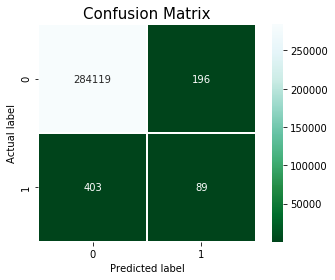

In [10]:
pretty_cm(y_pred, y, [0, 1])

The Forest is able to correctly identify 8.7% of anomalies in the dataset.

### eif

By setting `ExtensionLevel` to 0 I am estimating a regular Isolation Forest. A couple of words about this implementation. First of all, as of now there is no way of setting random state for the model, so running it multiple times might yield different results. Also the `eif` implementation does not have that many parameters to configure. 

Another thing is that the model predicts the anomaly scores, but does not automatically identify which observations are considered outliers. To identify the anomalies, I sort the anomaly scores and retrieve indices of 0.9% of observations with highest scores.

In [17]:
if_eif = iso.iForest(X_train.values, 
                     ntrees = 100, 
                     sample_size = 256, 
                     ExtensionLevel = 0)

# calculate anomaly scores
anomaly_scores = if_eif.compute_paths(X_in = X_train.values)
# sort the scores
anomaly_scores_sorted = np.argsort(anomaly_scores)
# retrieve indices of anomalous observations
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X_train.shape[0])):]
# create predictions 
y_pred_train = np.zeros_like(y_train)
y_pred_train[indices_with_preds] = 1

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9978
Precision: 0.2700
Recall: 0.1517
F1: 0.1942


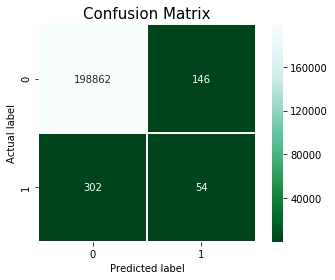

In [18]:
pretty_cm(y_pred_train, y_train, [0, 1])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_train,y_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199164
          1       0.15      0.27      0.19       200

avg / total       1.00      1.00      1.00    199364



In [22]:
anomaly_scores = if_eif.compute_paths(X_in = X_test.values)
# sort the scores
anomaly_scores_sorted = np.argsort(anomaly_scores)
# retrieve indices of anomalous observations
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X_test.shape[0])):]
# create predictions 
y_pred_test = np.zeros_like(y_test)
y_pred_test[indices_with_preds] = 1

#######################
Evaluation metrics ####
#######################
Accuracy: 0.9981
Precision: 0.3488
Recall: 0.2206
F1: 0.2703


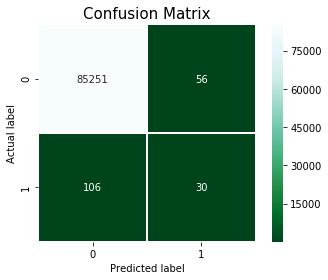

In [25]:
pretty_cm(y_pred_test, y_test, [0, 1])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_test,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85357
          1       0.22      0.35      0.27        86

avg / total       1.00      1.00      1.00     85443



## Extended Isolation Forest

This part is very similar to the vanilla Isolation Forest case (`eif` implementation) with the difference being the `ExtensionLevel`. To work on fully extended level, I set the level to 9 (number of dimensions - 1).

In [ ]:
eif = iso.iForest(X.values, 
                  ntrees = 100, 
                  sample_size = 256, 
                  ExtensionLevel = X.shape[1] - 1)

anomaly_scores = eif.compute_paths(X_in = X.values)
anomaly_scores_sorted = np.argsort(anomaly_scores)
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X.shape[0])):]
y_pred = np.zeros_like(y)
y_pred[indices_with_preds] = 1

In [ ]:
pretty_cm(y_pred, y, [0, 1])

As can be seen in the results, the model fails to identify a single anomaly in the dataset. Unfortunately, I do not have any explanation for this and if anyone knows what the issue might be, please let me know.

## Conclusions

The Extended Isolation Forest algorithm certainly is interesting and worth further exploring. It easily overcomes the limitations of the original model on a set of artificial examples, however, there seems to be some kind of problem when implementing it on a real life dataset. What is more, the current eif implementation is nearly as fast as the sklearn one. On my Macbook Pro the sklearn IF took 14s to train, while the eif implementations took roughly 10 minutes.

I really hope the algorithm will be further improved and will serve as a good tool for identifying anomalies.